In [90]:
import os
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


### 1. Data exploration:

In [91]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [92]:
# Show details of the dataset
# Show the size of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


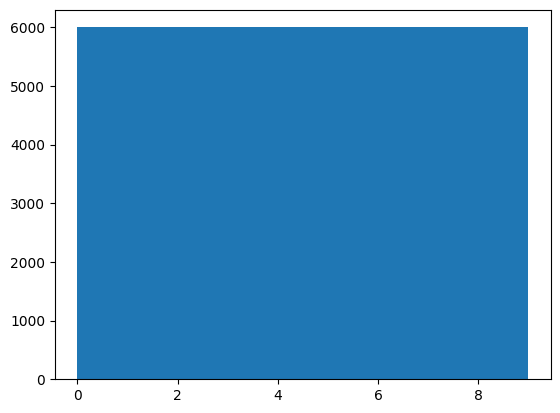

In [93]:
# Show the distribution of the classes
plt.hist(y_train, bins=10)
plt.show()

0 : T-shirt/top


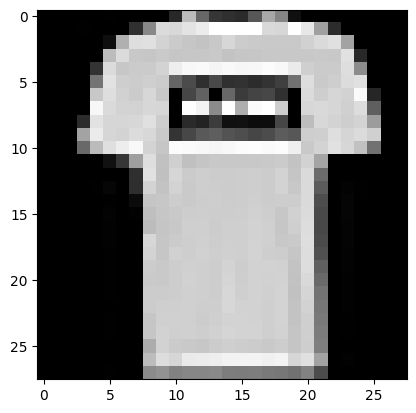

1 : Trouser


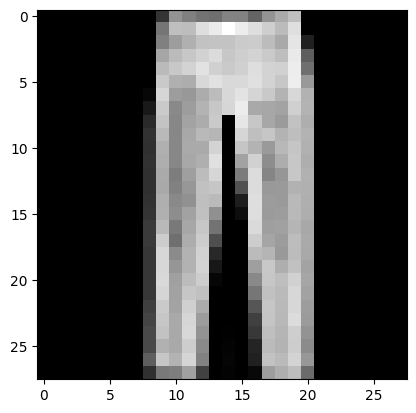

2 : Pullover


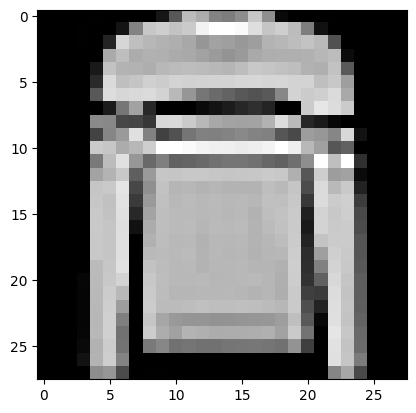

3 : Dress


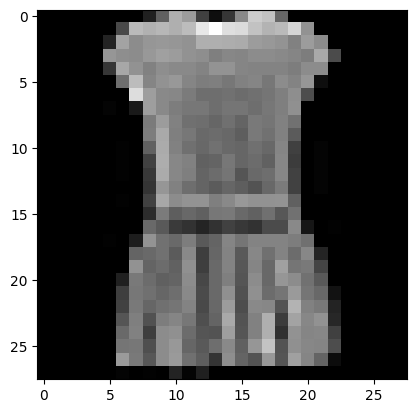

4 : Coat


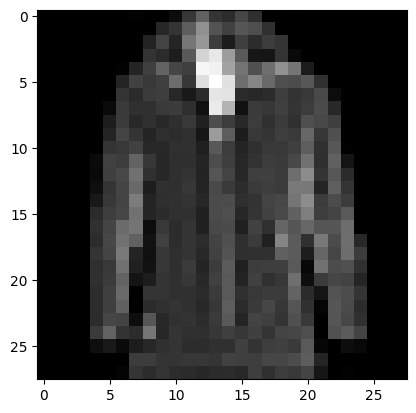

5 : Sandal


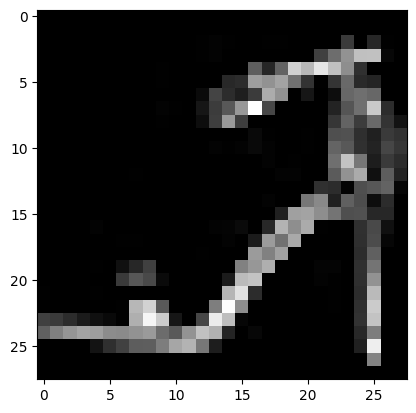

6 : Shirt


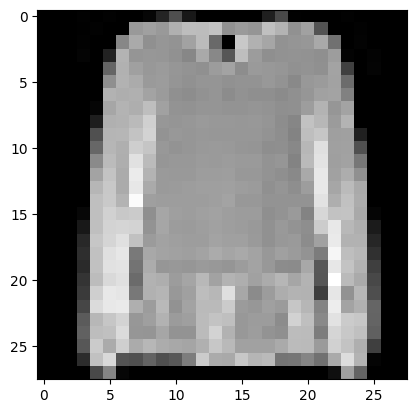

7 : Sneaker


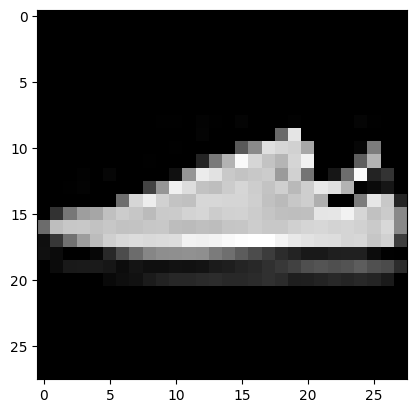

8 : Bag


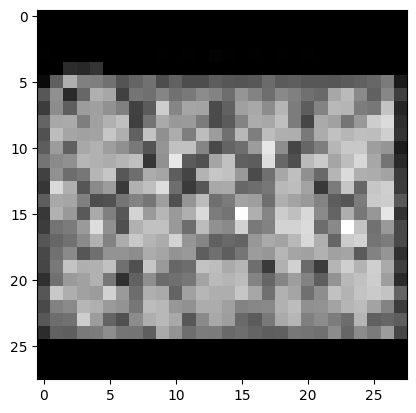

9 : Ankle boot


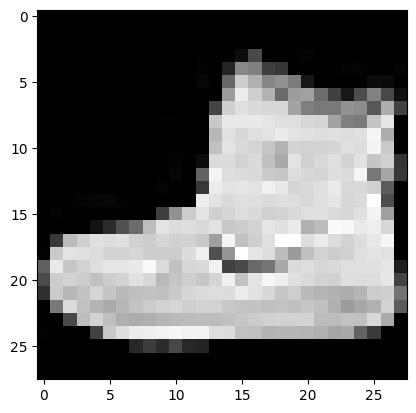

In [94]:
# Plot an image of every class
classes = "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
for i in range(10):
    plt.imshow(x_train[y_train == i][0], cmap='gray')
    print(y_train[y_train == i][0], ":", classes[i])
    plt.show()

In [95]:
# Select a classification metric, such as accuracy or another metric you find more suitable for the problem
# Accuracy is a good metric for this problem because it is a balanced dataset

### 2. Pre-processing:

In [96]:
# Set a random seed for NumPy and Keras
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
# Use the default splits for testing and training, and extract a validation dataset from the training set
# Data is already split into training and testing
# Splitting the training data into training and validation 4:1 ratio
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [98]:
# Normalize the data to ensure compatibility with the Keras neural networks interface.
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

### 3. Define your initial model:

In [118]:
# Build a Keras classifier model and print its initial architecture by calling the model’s summary method
model = models.Sequential()
# We add a convolutional layer that has 28 3x3 filters with
# relu activation function.
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# We add a pooling layer that uses the maximum function
# where the filter size is 2x2.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [119]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,642 (584.54 KB)

 Trainable params: 149,642 (584.54 KB)

 Non-trainable params: 0 (0.00 B)

In [120]:
# Choose a loss function for training the model and reasonable starting hyperparameter values
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
keras.backend.clear_session()

### 4. Train your model:

In [121]:
# Train your model for ten epochs using the training split of the FashionMnist dataset
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val))
keras.backend.clear_session()

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7393 - loss: 0.7180 - val_accuracy: 0.8631 - val_loss: 0.3748
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8747 - loss: 0.3399 - val_accuracy: 0.8781 - val_loss: 0.3268
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8951 - loss: 0.2813 - val_accuracy: 0.8858 - val_loss: 0.3041
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9082 - loss: 0.2438 - val_accuracy: 0.8923 - val_loss: 0.2918
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.9191 - loss: 0.2175 - val_accuracy: 0.8933 - val_loss: 0.3000
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9274 - loss: 0.1932 - val_accuracy: 0.8949 - val_loss: 0.3144
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9361 - loss: 0.1744 - val_accuracy: 0.8994 - val_loss: 0.3077
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9408 - 

313/313 - 2s - 6ms/step - accuracy: 0.8976 - loss: 0.3715
0.897599995136261


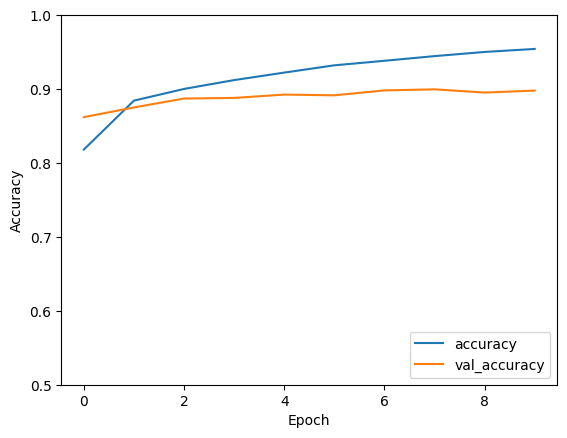

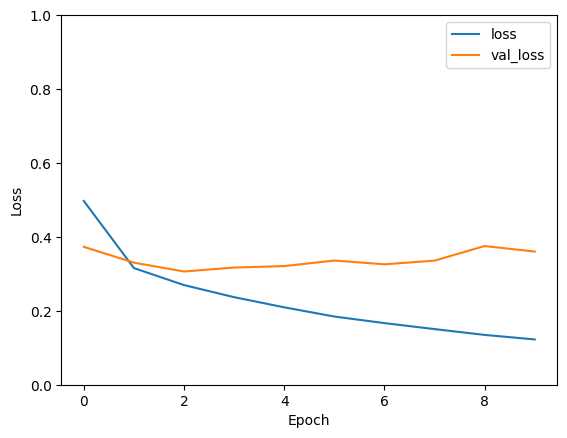

In [103]:
# Ensure that the model runs without errors and that the loss decreases more or less smoothly
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)
plt.show()

# Plot the loss of the model on the test and validation sets
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

5. Hyperparameter tuning:

In [112]:
# Create a new improved model by tuning and hyperparameters, use the same model as earlier
# Build a Keras classifier model and print its initial architecture by calling the model’s summary method
def create_model():
    model_creation = models.Sequential()
    # We add a convolutional layer that has 28 3x3 filters with
    # relu activation function.
    model_creation.add(layers.Input(shape=(28, 28, 1)))
    model_creation.add(layers.Conv2D(64, (3, 3), activation='relu'))
    # We add a pooling layer that uses the maximum function
    # where the filter size is 2x2.
    model_creation.add(layers.MaxPooling2D((2, 2)))
    model_creation.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_creation.add(layers.MaxPooling2D((2, 2)))
    model_creation.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model_creation.add(layers.Flatten())
    model_creation.add(layers.Dense(128, activation='relu'))
    model_creation.add(layers.Dense(10))
    return model_creation

In [113]:
# Implement the Keras EarlyStopping callback.
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=0.001,
    restore_best_weights=True,
)

In [114]:
# Select two hyperparameters and conduct a rough parameter search to fine-tune 
learning_rate = 0.00001  # This is a hyperparameter
batch_size = 32  # Another hyperparameter

In [122]:
results = pd.DataFrame(columns=['filters', 'kernel_size', 'pool_size', 'dense_units', 'accuracy', 'loss', 'batch_size', 'learning_rate'])
for batch_size in [16,32,64,128,256]:
    for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
        print()
        print("Batch size: ", batch_size)
        print("Learning rate: ", learning_rate)
        model = create_model()
        optimizer = Adam(learning_rate=learning_rate)
        model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_val, y_val),batch_size = batch_size, callbacks=[early_stopping])
        test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
        new_data = pd.DataFrame({'filters': 64, 'kernel_size': 3, 'pool_size': 2, 'dense_units': 128, 'accuracy': test_acc,'loss': test_loss, 'batch_size':batch_size, 'learning_rate':learning_rate, 'history':history, 'model': model}, index=[0]) 
        results = pd.concat([results, new_data], ignore_index=True)
        keras.backend.clear_session()


Batch size:  32
Learning rate:  0.0001
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6161 - loss: 1.1151 - val_accuracy: 0.8096 - val_loss: 0.5256
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8134 - loss: 0.5090 - val_accuracy: 0.8420 - val_loss: 0.4479
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8419 - loss: 0.4357 - val_accuracy: 0.8552 - val_loss: 0.4062
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8591 - loss: 0.3935 - val_accuracy: 0.8625 - val_loss: 0.3801
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8688 - loss: 0.3650 - val_accuracy: 0.8695 - val_loss: 0.3585
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8765 - loss: 0.3431 - val_accuracy: 0.8759 - val_loss: 0.3432
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8828 - loss: 0.3257 - val_accuracy: 0.8816 - val_loss: 0.3298
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━

C:\Users\elsha\AppData\Local\Temp\ipykernel_15572\1731136111.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_data], ignore_index=True)



Batch size:  32
Learning rate:  0.001
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7515 - loss: 0.6921 - val_accuracy: 0.8675 - val_loss: 0.3565
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8759 - loss: 0.3363 - val_accuracy: 0.8778 - val_loss: 0.3278
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8944 - loss: 0.2845 - val_accuracy: 0.8870 - val_loss: 0.3108
313/313 - 1s - 4ms/step - accuracy: 0.8611 - loss: 0.3723

Batch size:  32
Learning rate:  0.01
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7458 - loss: 0.6856 - val_accuracy: 0.8323 - val_loss: 0.4569
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8390 - loss: 0.4274 - val_accuracy: 0.8443 - val_loss: 0.4086
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8495 - loss: 0.4042 - val_accuracy: 0.8416 - val_loss: 0.4483
313/313 - 1s - 4ms/step - accuracy: 0.8294 - loss: 0.4659

Batch size:  6

In [123]:
# print(results.iloc[0])
print(results)

  filters kernel_size pool_size dense_units  accuracy      loss batch_size  \
0      64           3         2         128    0.8853  0.321573         32   
1      64           3         2         128    0.8611  0.372266         32   
2      64           3         2         128    0.8294  0.465893         32   
3      64           3         2         128    0.7729  0.616894         64   
4      64           3         2         128    0.8521  0.395849         64   
5      64           3         2         128    0.8368  0.432579         64   
6      64           3         2         128    0.7601  0.650272         96   
7      64           3         2         128    0.8498  0.413735         96   
8      64           3         2         128    0.8245  0.445077         96   

   learning_rate                                            history  \
0         0.0001  <keras.src.callbacks.history.History object at...   
1         0.0010  <keras.src.callbacks.history.History object at...   
2     

313/313 - 1s - 4ms/step - accuracy: 0.1000 - loss: 2.3026


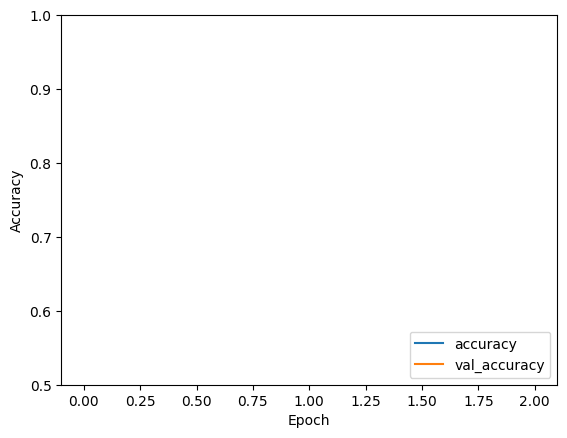

[0.17872396111488342, 0.16187499463558197]


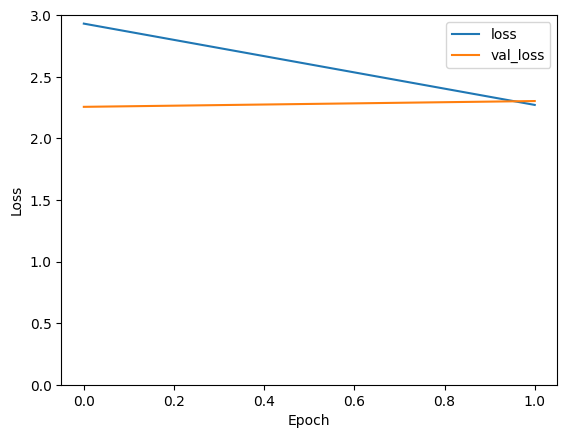

In [68]:
# Ensure that the model runs without errors and that the loss decreases more or less smoothly
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)
plt.show()

# Plot the loss of the model on the test and validation sets
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.show()

In [124]:
# Create a Pandas DataFrame file to report each run setup and performance metric and display its content
results = pd.DataFrame(columns=['filters', 'kernel_size', 'pool_size', 'dense_units', 'accuracy'])

In [125]:
# Save the DataFram as a CSV file and include it in your package
results.to_csv('results.csv')